### Import


In [1]:
import pandas as pd
import statistics
import numpy as np
import math
import scipy.stats as scistats

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


### Settings

In [2]:
input_file = "../data/sara_processing/Height_0_2021119113.txt"
species_name = "clarkii"
min_rt = 0.8
max_rt = 13

### import data

In [3]:
# meta data first 4 rows
meta = pd.read_csv(input_file, sep='\t', low_memory=False, skiprows=lambda x: x >4, header=None)
meta = meta.replace(['Qc{}fin 6.25%'.format(species_name)],'Qc{} fin6.25%'.format(species_name))

# main data + rename erroneous headers
data = pd.read_csv(input_file, sep='\t', low_memory=False, skiprows=4, header=0)
data.rename(columns = {'Qc{}fin 6.25%'.format(species_name):'Qc{} fin6.25%'.format(species_name)}, inplace = True)


FileNotFoundError: [Errno 2] No such file or directory: '../data/sara_processing/Height_0_2021119113.txt'

In [8]:
meta

,0,1,2,3,4,5,6,7,8,9,...,148,149,150,151,152,153,154,155,156,157
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Stdev,Stdev,Stdev,Stdev,Stdev,Stdev,Stdev,Stdev,Stdev,Stdev
4,Alignment ID,Average Rt(min),Average Mz,Metabolite name,Adduct type,Post curation result,Fill %,MS/MS assigned,Reference RT,Reference m/z,...,QCan,QCanemcond,QC12.5,QC25,QC50,QC100,QC6.25,QCclarkii,QCclarkiicond,QCfrencond


In [9]:
data

,Alignment ID,Average Rt(min),Average Mz,Metabolite name,Adduct type,Post curation result,Fill %,MS/MS assigned,Reference RT,Reference m/z,...,QCan.1,QCanemcond.1,QC12.5.1,QC25.1,QC50.1,QC100.1,QC6.25.1,QCclarkii.1,QCclarkiicond.1,QCfrencond.1
0,0,12.477,59.01279,w/o MS2:FA 2:0,[M-H]-,NaN,0.011,False,0.724,59.01390,...,207.784433,259.714792,3771.838082,2493.897945,3573.575422,2938.266220,2503.400383,1372.368099,515.309959,11981.445462
1,1,4.168,59.01280,w/o MS2:FA 2:0,[M-H]-,similar chromatogram in higher mz_1500; simila...,0.022,False,0.724,59.01390,...,347.301296,340.742110,1517.580282,1822.981013,629.365431,1448.641860,1567.220697,538.259150,325.776216,211.597050
2,2,8.410,59.01281,w/o MS2:FA 2:0,[M-H]-,NaN,0.054,False,0.724,59.01390,...,331.419705,669.240651,1955.153012,1845.659875,2658.825768,980.877258,2049.285221,1127.672345,362.355754,142.960869
3,3,5.976,59.01284,w/o MS2:FA 2:0,[M-H]-,NaN,0.033,False,0.724,59.01390,...,422.584690,876.746482,1205.374339,1661.290068,1014.550111,1025.144284,1627.995628,859.220321,217.237702,397.317327
4,4,12.534,59.01285,w/o MS2:FA 2:0,[M-H]-,found in higher mz's MsMs_4243; found in highe...,0.011,False,0.724,59.01390,...,918.941886,519.426213,4238.453980,4064.168040,2776.907076,2566.046315,3325.013578,1635.179459,877.380528,12386.381101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13306,13306,10.278,1497.98230,w/o MS2:CL 12:0_20:3_22:3_22:5,[M+Hac-H]-,adduct linked to 13188_[M-H]-,0.283,False,13.350,1497.98059,...,7.222252,46.375833,86.998567,5.348725,18.090264,122.828384,10.660647,103.688379,106.874843,127.369150
13307,13307,6.687,1498.07166,w/o MS2:CL 12:0_15:0_28:0_20:4,[M-H]-,ion correlated with 6305; ion correlated with ...,0.087,False,13.890,1498.07446,...,2.729940,1658.934081,0.000000,6.288218,0.000000,9.327808,0.000000,24.030191,0.000000,0.000000
13308,13308,9.338,1498.29663,Unknown,[M-H]-,ion correlated with 13072; ion correlated with...,0.011,False,NaN,NaN,...,0.233854,125.524080,60.145635,0.000000,46.251930,28.409698,30.355417,39.929450,20.152151,28.864729
13309,13309,7.664,1499.08533,Unknown,[M-H]-,ion correlated with 13030; ion correlated with...,0.011,False,NaN,NaN,...,2.816550,0.000000,10.485246,31.868175,49.017548,29.819431,27.403457,30.623591,0.000000,0.000000


### Filter RT

In [10]:
# filter rt  
data_f1 = data[(data['Average Rt(min)']>min_rt) & (data['Average Rt(min)']<max_rt)]
data_f1.shape

(11746, 158)

### Filter QC 

In [11]:

def Qc_count_zero(row, aux):
    
    count_zero = 0
    percent = ['6.25', '12.5', '25', '50', '100']
    
    for p in percent:
        if int(row['Qc{} {}{}%'.format(species_name,aux,  p)]) == 0:
            count_zero +=1 

    if count_zero > 2:
        return  False
    else:
        return True


#create a new column
data_f1['Qcin_zeros'] = data_f1.apply(lambda x : Qc_count_zero(x, 'in') ,axis=1)
data_f1['Qcfin_zeros'] = data_f1.apply(lambda x : Qc_count_zero(x, 'fin') ,axis=1)

#simple filter on new column
data_f2 = data_f1[data_f1['Qcin_zeros'] & data_f1['Qcfin_zeros'] ]
data_f2.shape

/var/folders/wn/7gdt_pjn02j1w8_73ql8mp880000gn/T/ipykernel_60432/1949210353.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_f1['Qcin_zeros'] = data_f1.apply(lambda x : Qc_count_zero(x, 'in') ,axis=1)
/var/folders/wn/7gdt_pjn02j1w8_73ql8mp880000gn/T/ipykernel_60432/1949210353.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_f1['Qcfin_zeros'] = data_f1.apply(lambda x : Qc_count_zero(x, 'fin') ,axis=1)


(8797, 160)

### Filter Blank

In [12]:

def mean_blank(row):
    
    blank = []
    
    for i in range(1,8):
        blank.append(int(row['Blank{}'.format(i)]))
        
    return statistics.mean(blank)
        
def mean_qc(row):
    
    qc = []
    
    for i in range(1,9):
        qc.append(int(row['QC{}{}'.format(species_name, i)]))
        
    return statistics.mean(qc)

#create a new column
data_f2['mean_blank'] = data_f2.apply(lambda x : mean_blank(x) ,axis=1)
data_f2['mean_Qc'] = data_f2.apply(lambda x : mean_qc(x) ,axis=1)

#simple filter on new column
data_f3 = data_f2[data_f2['mean_Qc']/data_f2['mean_Qc'] > 1 ]
data_f3.shape


/var/folders/wn/7gdt_pjn02j1w8_73ql8mp880000gn/T/ipykernel_60432/418856336.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_f2['mean_blank'] = data_f2.apply(lambda x : mean_blank(x) ,axis=1)
/var/folders/wn/7gdt_pjn02j1w8_73ql8mp880000gn/T/ipykernel_60432/418856336.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_f2['mean_Qc'] = data_f2.apply(lambda x : mean_qc(x) ,axis=1)


(0, 162)

In [13]:
def std_qc(row):
    
    qc = []
    
    for i in range(1,9):
        qc.append(int(row['QC{}{}'.format(species_name, i)]))
        
    return statistics.stdev(qc)

def calc_CV(row):
    
    if int(row['mean_Qc']) == 0:
        return 0
    
    return  row['stdev'] / row['mean_Qc'] * 100 

#create a new column
data_f2['stdev'] = data_f2.apply(lambda x : std_qc(x) ,axis=1)
data_f2['CV'] = data_f2.apply(lambda x : calc_CV(x) ,axis=1)

#simple filter on new column
data_f3 = data_f2[data_f2['CV'] <= 90 ]
data_f3.shape

/var/folders/wn/7gdt_pjn02j1w8_73ql8mp880000gn/T/ipykernel_60432/865074168.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_f2['stdev'] = data_f2.apply(lambda x : std_qc(x) ,axis=1)
/var/folders/wn/7gdt_pjn02j1w8_73ql8mp880000gn/T/ipykernel_60432/865074168.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_f2['CV'] = data_f2.apply(lambda x : calc_CV(x) ,axis=1)


(8461, 164)

### Meta  for App 

In [14]:
m = []
for col in meta:
    if  species_name in meta[col].values[4] and not 'cond' in meta[col].values[4] :
        if meta[col].values[3] != 'Average':
            if meta[col].values[3] != 'Stdev':
                v = list(meta[col].values)
                m.append([v[4], v[2], v[1], v[0]])


In [15]:
df_meta = pd.DataFrame(m, columns=['Sample_ID', 'InjectionOrder', 'Type', 'Class'])
df_sort = df_meta.sort_values('InjectionOrder')
df_sort.to_csv('output/meta_{}.csv'.format(species_name), index=False, index_label=False)

In [16]:
sorted(list(df_meta['InjectionOrder']))

['13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '46',
 '48',
 '49',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '60',
 '61',
 '62',
 '63',
 '64',
 '65',
 '66',
 '67',
 '68',
 '69',
 '70',
 '71',
 '72',
 '73']

In [17]:
df_sort

,Sample_ID,InjectionOrder,Type,Class
47,Qcclarkii in6.25%,13,QC,QC6.25
48,Qcclarkii in12.5%,14,QC,QC12.5
49,Qcclarkii in25%,15,QC,QC25
50,Qcclarkii in50%,16,QC,QC50
51,Qcclarkii in100%,17,QC,QC100
...,...,...,...,...
60,Qcclarkii fin6.25%,69,QC,QC6.25
43,Qcclarkii fin12.5%,70,QC,QC12.5
44,Qcclarkii fin25%,71,QC,QC25
45,Qcclarkii fin50%,72,QC,QC50


### Data for App

In [18]:
list_header = ['Alignment ID']
list_header += list(df_sort['Sample_ID'])
data_final  = data_f3[list_header]
data_final.to_csv('output/data_{}.csv'.format(species_name), index=False, index_label=False)

In [19]:
data_f3

,Alignment ID,Average Rt(min),Average Mz,Metabolite name,Adduct type,Post curation result,Fill %,MS/MS assigned,Reference RT,Reference m/z,...,QC6.25.1,QCclarkii.1,QCclarkiicond.1,QCfrencond.1,Qcin_zeros,Qcfin_zeros,mean_blank,mean_Qc,stdev,CV
0,0,12.477,59.01279,w/o MS2:FA 2:0,[M-H]-,NaN,0.011,False,0.724,59.01390,...,2503.400383,1372.368099,515.309959,11981.445462,True,True,16128.428571,15742.875,1372.308008,8.717010
1,1,4.168,59.01280,w/o MS2:FA 2:0,[M-H]-,similar chromatogram in higher mz_1500; simila...,0.022,False,0.724,59.01390,...,1567.220697,538.259150,325.776216,211.597050,True,True,5671.142857,6823.375,538.215288,7.887816
2,2,8.410,59.01281,w/o MS2:FA 2:0,[M-H]-,NaN,0.054,False,0.724,59.01390,...,2049.285221,1127.672345,362.355754,142.960869,True,True,11053.714286,10731.000,1127.692587,10.508737
3,3,5.976,59.01284,w/o MS2:FA 2:0,[M-H]-,NaN,0.033,False,0.724,59.01390,...,1627.995628,859.220321,217.237702,397.317327,True,True,6401.571429,8297.250,859.238325,10.355700
4,4,12.534,59.01285,w/o MS2:FA 2:0,[M-H]-,found in higher mz's MsMs_4243; found in highe...,0.011,False,0.724,59.01390,...,3325.013578,1635.179459,877.380528,12386.381101,True,True,17069.285714,16832.750,1635.111595,9.713871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13301,13301,7.233,1496.14563,Unknown,[M-H]-,NaN,0.011,False,NaN,NaN,...,0.000000,39.439842,20.190940,26.422452,True,True,23.571429,63.250,39.325564,62.174805
13305,13305,10.109,1497.98193,w/o MS2:CL 12:0_20:3_22:3_22:5,[M-H]-,NaN,0.391,False,13.350,1497.98059,...,142.577494,91.830227,272.759641,127.772187,True,True,24.285714,2486.125,91.881037,3.695753
13306,13306,10.278,1497.98230,w/o MS2:CL 12:0_20:3_22:3_22:5,[M+Hac-H]-,adduct linked to 13188_[M-H]-,0.283,False,13.350,1497.98059,...,10.660647,103.688379,106.874843,127.369150,True,True,19.857143,1530.500,103.844664,6.785016
13308,13308,9.338,1498.29663,Unknown,[M-H]-,ion correlated with 13072; ion correlated with...,0.011,False,NaN,NaN,...,30.355417,39.929450,20.152151,28.864729,True,True,720.571429,46.875,39.908601,85.138349


In [20]:
data_final

,Alignment ID,Qcclarkii in6.25%,Qcclarkii in12.5%,Qcclarkii in25%,Qcclarkii in50%,Qcclarkii in100%,QCclarkii1,A.clarkii T72hI7exp,A.clarkii T0I3exp,A.clarkii T72hI1ctrl,...,A.clarkii T0I10exp,A.clarkii T72hI6ctrl,A.clarkii T0I10ctrl,A.clarkii T72hI2exp,QCclarkii8,Qcclarkii fin6.25%,Qcclarkii fin12.5%,Qcclarkii fin25%,Qcclarkii fin50%,Qcclarkii fin100%
0,0,14779,13701,14402,14333,14605,15762,16365,15321,14920,...,18355,17185,18007,18263,18668,18320,19035,17929,19387,18760
1,1,5245,5041,5347,5598,6068,6618,7063,6235,5377,...,8648,6986,7192,8478,7484,7462,7187,7925,6488,8117
2,2,9481,9554,10543,9561,10516,9830,10565,10524,9873,...,11220,11244,11482,11861,12971,12379,12319,13153,13322,11903
3,3,5803,6039,5694,6415,7560,7264,8160,6332,6474,...,11517,8838,11821,7280,9623,8106,7744,8043,7850,9010
4,4,16012,15677,14402,15943,15131,15762,16064,15321,16370,...,19064,18908,20221,19523,20605,20715,21671,20149,19870,18760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13301,13301,0,37,50,53,0,37,0,85,0,...,330,70,362,36,109,0,45,43,7,45
13305,13305,105,191,597,1205,2643,2486,2992,1447,543,...,5490,1644,6696,1086,2475,306,254,702,1195,2629
13306,13306,94,188,418,672,1542,1658,1480,1161,303,...,3323,1284,4712,730,1497,79,65,410,697,1715
13308,13308,35,127,0,39,0,0,64,42,0,...,0,0,45,39,80,78,42,0,104,40


### Data from App

In [38]:
input_file_app = "../data/sara_processing/clarkii_RPneg_APPoutput.csv"
input_file_protein =  "../data/sara_processing/clarkii_meanProt.csv"

### Import data


In [39]:
app = pd.read_csv(input_file_app, sep=';', low_memory=False)
protein = pd.read_csv(input_file_protein, sep=';', low_memory=False)

In [40]:
app

,FtrID,A.clarkii T72hI7exp,A.clarkii T0I3exp,A.clarkii T72hI1ctrl,A.clarkii T72hI10ctrl,A.clarkii T72hI7ctrl,A.clarkii T0I5ctrl,A.clarkii T0I1ctrl,A.clarkii T0I3ctrl,A.clarkii T72hI6exp,...,A.clarkii T72hI4ctrl,A.clarkii T0I11ctrl,A.clarkii T0I7exp,A.clarkii T0I9ctrl,A.clarkii T72hI9exp,A.clarkii T72hI9ctrl,A.clarkii T0I10exp,A.clarkii T72hI6ctrl,A.clarkii T0I10ctrl,A.clarkii T72hI2exp
0,10005_neg,1706,836,487,1169,1380,1463,35,599,1313,...,1398,2262,702,1348,3501,2648,2763,2218,3660,598
1,10006_neg,1075,743,472,578,898,717,66,332,990,...,744,2322,583,1086,1355,1367,770,780,1489,421
2,10009_neg,1284,1026,1132,1149,1228,1174,1077,996,1217,...,1164,1208,1033,1221,1160,1451,1052,1123,1214,1171
3,10011_neg,2415,748,1137,2006,1888,2738,484,633,2215,...,1806,2307,1175,1943,3862,3368,3037,2035,2576,763
4,10014_neg,1697,1222,652,1347,1347,1558,253,804,1275,...,1103,1659,1053,1640,1486,1506,1852,1509,1740,676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2426,9990_neg,14392,9723,4701,7946,12718,19683,1818,5815,14110,...,10483,15718,9713,13517,18336,10912,18763,13694,23009,6627
2427,9992_neg,2125,935,241,1216,999,1276,160,270,1319,...,1044,1296,771,1516,2364,2114,2408,726,2064,751
2428,9993_neg,5372,1748,604,2419,2783,4827,197,1777,3685,...,2701,5160,3773,5126,5133,4641,8515,2975,9922,1562
2429,9996_neg,3901,2785,2496,2310,3522,3872,579,1972,4518,...,2866,4786,3163,6468,4786,3266,7413,1822,9278,1571


In [41]:
protein

,Sample_ID,MeanProt
0,A.clarkii.T0I10ctrl,527.40
1,A.clarkii.T0I10exp,512.65
2,A.clarkii.T0I11ctrl,316.20
3,A.clarkii.T0I11exp,309.30
4,A.clarkii.T0I1ctrl,44.85
...,...,...
83,QCcondclarkii2,NaN
84,QCcondclarkii3,NaN
85,QCcondclarkii4,NaN
86,QCcondclarkii5,NaN


### Augment data

In [42]:
data_to_augment = ['Average Rt(min)','Average Mz','Metabolite name','Adduct type']

def augment_data(row):
    query = row['FtrID'].replace('_neg', '')
    x = data_f3.loc[data_f3['Alignment ID'] == int(query)]
    return pd.Series([list(x[h])[0] for h in data_to_augment])
    
app[data_to_augment] = app.apply(lambda x : augment_data(x) ,axis=1)


In [43]:
for c in reversed(data_to_augment):
    col = app.pop(c)
    app.insert(1, col.name, col)

In [44]:
app

,FtrID,Average Rt(min),Average Mz,Metabolite name,Adduct type,A.clarkii T72hI7exp,A.clarkii T0I3exp,A.clarkii T72hI1ctrl,A.clarkii T72hI10ctrl,A.clarkii T72hI7ctrl,...,A.clarkii T72hI4ctrl,A.clarkii T0I11ctrl,A.clarkii T0I7exp,A.clarkii T0I9ctrl,A.clarkii T72hI9exp,A.clarkii T72hI9ctrl,A.clarkii T0I10exp,A.clarkii T72hI6ctrl,A.clarkii T0I10ctrl,A.clarkii T72hI2exp
0,10005_neg,5.325,849.56720,w/o MS2:PG 6:0_36:6,[M-H]-,1706,836,487,1169,1380,...,1398,2262,702,1348,3501,2648,2763,2218,3660,598
1,10006_neg,5.383,849.56927,w/o MS2:PG 6:0_36:6,[M-H]-,1075,743,472,578,898,...,744,2322,583,1086,1355,1367,770,780,1489,421
2,10009_neg,11.166,849.63385,w/o MS2:NAGlySer 19:1;O(FA 28:6),[M-H]-,1284,1026,1132,1149,1228,...,1164,1208,1033,1221,1160,1451,1052,1123,1214,1171
3,10011_neg,8.025,849.64813,w/o MS2:PE-Cer 13:1;2O/34:4;O,[M-H]-,2415,748,1137,2006,1888,...,1806,2307,1175,1943,3862,3368,3037,2035,2576,763
4,10014_neg,5.964,850.49115,w/o MS2:PE 18:2_22:6;4O,[M-H]-,1697,1222,652,1347,1347,...,1103,1659,1053,1640,1486,1506,1852,1509,1740,676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2426,9990_neg,6.815,848.54340,w/o MS2:RIKEN N-VS1 ID-6828 from Mouse_Macroph...,[M-H]-,14392,9723,4701,7946,12718,...,10483,15718,9713,13517,18336,10912,18763,13694,23009,6627
2427,9992_neg,5.714,848.58185,w/o MS2:PC O-10:0_28:7,[M-H]-,2125,935,241,1216,999,...,1044,1296,771,1516,2364,2114,2408,726,2064,751
2428,9993_neg,6.000,848.58264,w/o MS2:PC O-10:0_28:7,[M-H]-,5372,1748,604,2419,2783,...,2701,5160,3773,5126,5133,4641,8515,2975,9922,1562
2429,9996_neg,6.897,848.64862,w/o MS2:HexCer 16:0;3O/22:0;(2OH),[M-H]-,3901,2785,2496,2310,3522,...,2866,4786,3163,6468,4786,3266,7413,1822,9278,1571


In [45]:
app.to_csv('output/data_final_{}.csv'.format(species_name), index=False, index_label=False)

### Normalise


In [28]:
concentration = {}

for ech in list_header:
    if ech in app.columns:
        if species_name in ech:
            rp = protein.loc[protein['Sample_ID'] == ech.replace(' ', '.')]
            if list(rp['MeanProt']) and not math.isnan(list(rp['MeanProt'])[0]) :
                concentration[ech] = list(rp['MeanProt'])
                        

In [29]:
for h, conc in concentration.items():
    app[h] = app.apply(lambda x : x[h] / conc[0] ,axis=1)
    log_name = h + '_log'
    app[log_name] = app.apply(lambda x : math.log(x[h]) ,axis=1)

In [30]:
app

,FtrID,Average Rt(min),Average Mz,Metabolite name,Adduct type,A.clarkii T72hI7exp,A.clarkii T0I3exp,A.clarkii T72hI1ctrl,A.clarkii T72hI10ctrl,A.clarkii T72hI7ctrl,...,A.clarkii T72hI4ctrl_log,A.clarkii T0I11ctrl_log,A.clarkii T0I7exp_log,A.clarkii T0I9ctrl_log,A.clarkii T72hI9exp_log,A.clarkii T72hI9ctrl_log,A.clarkii T0I10exp_log,A.clarkii T72hI6ctrl_log,A.clarkii T0I10ctrl_log,A.clarkii T72hI2exp_log
0,10005_neg,5.325,849.56720,w/o MS2:PG 6:0_36:6,[M-H]-,5.156415,3.649062,3.549563,6.593345,4.981050,...,2.003170,1.967630,1.450415,1.742969,2.064079,2.536120,1.684479,2.209860,1.937259,1.327521
1,10006_neg,5.383,849.56927,w/o MS2:PG 6:0_36:6,[M-H]-,3.249207,3.243125,3.440233,3.260011,3.241292,...,1.372413,1.993809,1.264669,1.526849,1.114832,1.874934,0.406797,1.164793,1.037901,0.976563
2,10009_neg,11.166,849.63385,w/o MS2:NAGlySer 19:1;O(FA 28:6),[M-H]-,3.880913,4.478394,8.250729,6.480541,4.432413,...,1.819989,1.340346,1.836704,1.644017,0.959450,1.934569,0.718855,1.529258,0.833717,1.999543
3,10011_neg,8.025,849.64813,w/o MS2:PE-Cer 13:1;2O/34:4;O,[M-H]-,7.299380,3.264950,8.287172,11.314157,6.814654,...,2.259241,1.987328,1.965505,2.108580,2.162215,2.776635,1.779032,2.123750,1.586034,1.571188
4,10014_neg,5.964,850.49115,w/o MS2:PE 18:2_22:6;4O,[M-H]-,5.129213,5.333915,4.752187,7.597293,4.861938,...,1.766161,1.657595,1.855880,1.939044,1.207118,1.971773,1.284428,1.824702,1.193681,1.450123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2426,9990_neg,6.815,848.54340,w/o MS2:RIKEN N-VS1 ID-6828 from Mouse_Macroph...,[M-H]-,43.500076,42.439983,34.263848,44.816695,45.905071,...,4.017882,3.906187,4.077702,4.048295,3.719897,3.952179,3.600049,4.030212,3.775681,3.732837
2427,9992_neg,5.714,848.58185,w/o MS2:PC O-10:0_28:7,[M-H]-,6.422850,4.081187,1.756560,6.858432,3.605847,...,1.711186,1.410663,1.544170,1.860423,1.671385,2.310898,1.546958,1.093049,1.364442,1.555336
2428,9993_neg,6.000,848.58264,w/o MS2:PC O-10:0_28:7,[M-H]-,16.236965,7.629856,4.402332,13.643542,10.045118,...,2.661749,2.792317,3.132107,3.078673,2.446721,3.097246,2.809991,2.503499,2.934551,2.287652
2429,9996_neg,6.897,848.64862,w/o MS2:HexCer 16:0;3O/22:0;(2OH),[M-H]-,11.790842,12.156264,18.192420,13.028765,12.712507,...,2.721044,2.717075,2.955758,3.311214,2.376725,2.745882,2.671397,2.013189,2.867442,2.293398


### T Test

In [31]:
input_matches = '../data/sara_processing/clarkii_T0_T72h_matches.csv'
matches = pd.read_csv(input_matches, sep=';', low_memory=False)
matches

,T0,T72h
0,A.clarkii ctrl T0I1,A.clarkii ctrl T72hI1
1,A.clarkii ctrl T0I2,A.clarkii ctrl T72hI3
2,A.clarkii ctrl T0I3,A.clarkii ctrl T72hI2
3,A.clarkii ctrl T0I4,A.clarkii ctrl T72hI4
4,A.clarkii ctrl T0I5,A.clarkii ctrl T72hI5
5,A.clarkii ctrl T0I6,A.clarkii ctrl T72hI6
6,A.clarkii ctrl T0I7,A.clarkii ctrl T72hI7
7,A.clarkii ctrl T0I8,A.clarkii ctrl T72hI9
8,A.clarkii ctrl T0I9,A.clarkii ctrl T72hI10
9,A.clarkii ctrl T0I10,A.clarkii ctrl T72hI8


In [32]:
for row in matches.iterrows():
    lr = row[1][0].split(' ')
    left = '{} {}{}_log'.format(lr[0], lr[2], lr[1])
    
    rr = row[1][1].split(' ')
    right = '{} {}{}_log'.format(rr[0], rr[2], rr[1])
    
    if left in app.columns:
        if right in app.columns:
            tt = scistats.ttest_rel(app[left], app[right])
            print('| {} |  - | {} | >  {}  ({})'.format(left,right, tt[1], tt[1] < 0.05 ))
        else:
            pass
            #print(right, 'not found')
    else:
        pass
        #print(left, 'not found')
    
    
    
    

| A.clarkii T0I1ctrl_log |  - | A.clarkii T72hI1ctrl_log | >  3.1383227084756227e-77  (True)
| A.clarkii T0I2ctrl_log |  - | A.clarkii T72hI3ctrl_log | >  0.0  (True)
| A.clarkii T0I3ctrl_log |  - | A.clarkii T72hI2ctrl_log | >  6.102265023731192e-20  (True)
| A.clarkii T0I4ctrl_log |  - | A.clarkii T72hI4ctrl_log | >  3.5297651407590584e-19  (True)
| A.clarkii T0I5ctrl_log |  - | A.clarkii T72hI5ctrl_log | >  4.712213342937752e-280  (True)
| A.clarkii T0I6ctrl_log |  - | A.clarkii T72hI6ctrl_log | >  2.273114198448383e-16  (True)
| A.clarkii T0I7ctrl_log |  - | A.clarkii T72hI7ctrl_log | >  1.7282371840922313e-180  (True)
| A.clarkii T0I8ctrl_log |  - | A.clarkii T72hI9ctrl_log | >  4.8791993937142846e-82  (True)
| A.clarkii T0I9ctrl_log |  - | A.clarkii T72hI10ctrl_log | >  0.03219026120391772  (True)
| A.clarkii T0I10ctrl_log |  - | A.clarkii T72hI8ctrl_log | >  2.3569066661219637e-18  (True)
| A.clarkii T0I11ctrl_log |  - | A.clarkii T72hI11ctrl_log | >  1.7253867030179279e-43  (Tr

In [33]:
 import numpy as np
from sklearn.manifold import TSNE

cols = []

for ech in app.columns:
    if species_name in ech:
        cols.append(ech)
        
X = np.array([app[name] for name in cols])
X_embedded = TSNE(n_components=2, learning_rate='auto',init='random').fit_transform(X)
X_embedded.shape


(84, 2)

In [34]:
X_embedded

array([[ 3.359452  , -3.7450614 ],
       [ 0.5252773 , -1.8616306 ],
       [ 3.177241  , -2.1984138 ],
       [ 4.796276  , -3.2670422 ],
       [ 3.596834  , -3.8462386 ],
       [ 4.257018  , -3.672781  ],
       [ 0.22147202, -1.6976134 ],
       [ 0.42509267, -1.7983571 ],
       [ 2.9700372 , -3.760675  ],
       [ 4.998263  , -4.2219114 ],
       [ 4.6464753 , -3.8263626 ],
       [ 2.485099  , -2.9639175 ],
       [ 4.375987  , -1.9813724 ],
       [ 2.368971  , -2.8885572 ],
       [ 3.7271101 , -3.3545668 ],
       [ 2.7467084 , -4.155579  ],
       [ 4.7576375 , -2.9568985 ],
       [ 1.8686825 , -2.616455  ],
       [ 4.556497  , -4.1617684 ],
       [ 5.5525446 , -4.0582447 ],
       [ 3.4939222 , -4.2794337 ],
       [ 4.91869   , -2.7690167 ],
       [ 3.4686174 , -0.9770386 ],
       [ 3.7333314 , -3.3482344 ],
       [ 5.308254  , -3.9615672 ],
       [ 4.340809  , -3.860673  ],
       [ 3.1842754 , -4.025788  ],
       [ 3.8048685 , -3.2957442 ],
       [ 3.6637552 ,

In [35]:
from matplotlib import pyplot as plt

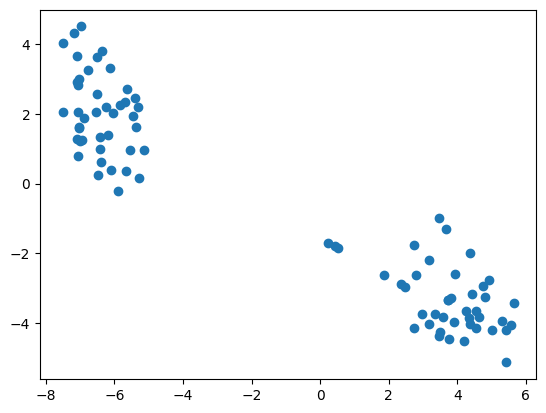

In [36]:
# plot
fig, ax = plt.subplots()

x = [i[0] for i in X_embedded]
y = [i[1] for i in X_embedded]

ax.scatter(x,y)

plt.show()